# 유방암 분류 with Tensorflow 1.x

스케일러 쓰는 이유

- 자릿수랑 범위 통일시켜서 예측 향상

    - Min Max Scaling

      -  최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위로 데이터 값을 표준화 

      - 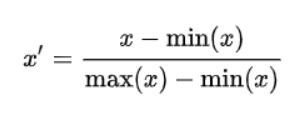

  - StandardScaler

    - 평균 0 , 분산 1로 조정 


[어떤 스케일러를 쓸 것인가?](https://mkjjo.github.io/python/2019/01/10/scaler.html)






In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import pandas as pd

In [ ]:
tf.__version__
tf.enable_eager_execution()

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
# dictionary 형태라서 key, values로 출력

print("cancer의 Key \n",cancer.keys())
print("=" *  100)
print("cancer의 Values\n",cancer.values())

In [ ]:
# 독립 변수
X = cancer.data
print("X dtype 기존 :",X.dtype)

# tensorlflow는 float32 사용 
X = np.array(X, dtype = 'float32')
print("X dtype 변환 후 :",X.dtype)

X dtype 기존 : float64
X dtype 변환 후 : float32


In [ ]:
# 종속 변수
y =  cancer.target
print("y dtype 기존 : ", y.dtype)

y = np.array(y,dtype = 'float32')
print("y dtype 변환 후 :", y.dtype)

y dtype 기존 :  int64
y dtype 변환 후 : float32


In [ ]:
# 독립변수 X 로 y 예측할려면  두개의 차원이 같아야함
print("X.shape :", X.shape)
print("y.shape :",y.shape)

# reshape(줄, 칸) 
# -1 : 자동 전체 선택
y = y.reshape(-1, 1)

print("y.shape 변환 후 ",y.shape)

X.shape : (569, 30)
y.shape : (569,)
y.shape 변환 후  (569, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
df = pd.DataFrame({
               "x1": [-200, -100, 0, 100, 200] ,
                "x2":[ 0   ,1000, 2000, 3000, 4000]
              })

In [ ]:
df.describe()

,x1,x2
count,5.000000,5.00000
mean,0.000000,2000.00000
std,158.113883,1581.13883
min,-200.000000,0.00000
25%,-100.000000,1000.00000
50%,0.000000,2000.00000
75%,100.000000,3000.00000
max,200.000000,4000.00000


In [ ]:
# MinMax Scaler() 
# 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위로 데이터 값을 표준화
# (데이터 - 칸 최솟값) /  (칸 최대 - 칸최소)

scaler = MinMaxScaler()

# 각 칸의 최소 최대 계산
# min-max값 학습
scaler.fit(df)

# 전환
scaler.transform(df)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [ ]:
df.describe()

,x1,x2
count,5.000000,5.00000
mean,0.000000,2000.00000
std,158.113883,1581.13883
min,-200.000000,0.00000
25%,-100.000000,1000.00000
50%,0.000000,2000.00000
75%,100.000000,3000.00000
max,200.000000,4000.00000


In [ ]:
# Standard Scler
# (데이터 -  평균)/표준편차(std)
# 평균 0 , 분산 1로 조정

scaler = StandardScaler()

# 각 칸 계산
scaler.fit(df)

# 전환
scaler.transform(df)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
X_train[0]

array([ 3.6764529 ,  0.597194  ,  3.6599445 ,  4.414332  ,  0.90558636,
        1.6025816 ,  2.4452903 ,  3.510917  , -0.02921765, -0.7550879 ,
        1.439144  ,  0.47384727,  1.3294439 ,  1.7655972 , -0.8638808 ,
       -0.01135388, -0.01977271,  0.1044408 , -0.56354314, -0.4022743 ,
        3.4497998 ,  1.1544805 ,  3.3198195 ,  4.0147395 ,  0.6564739 ,
        0.9478734 ,  1.2806224 ,  2.3158352 , -0.03568011, -0.18511358],
      dtype=float32)

In [ ]:
# 예측값 계산 
# w,b 의 맨처음 값을 어떤 값으로 줘야 cost가 0이되는 w,b를 빨리 찾을까?
# 방법 1 : Xavier
# 방법 2 : her


# 방법 1
initializer = tf.contrib.layers.xavier_initializer()

# [줄, 칸]  30줄 1칸
w = tf.Variable(initializer([30 , 1 ]))

b = tf.Variable(initializer([1]))

In [ ]:
w

In [ ]:
 tf.Variable(initializer([30 , 1 ]))

In [ ]:
X_train.shape

(426, 30)

In [ ]:
# tf.matmul : 행렬 곱하기
tf.matmul(X_train, w) +b


In [ ]:
def sigmoid(h):
  return 1/(1+ np.exp(-h))

In [ ]:
hypothesis = sigmoid(tf.matmul(X_train, w) +b)

In [ ]:
optimizer = tf.train.AdamOptimizer(0.0001)

In [ ]:
for step in range(30000):
  print("="*100)
  print("step = ", step)
  with tf.GradientTape() as tape:
    hypothesis = tf.sigmoid(tf.matmul(X_train, w) + b)
    
    #print("hypothesis(예측) : ", hypothesis)
    cost = -tf.reduce_mean(y_train * tf.log(hypothesis)+(1 - y_train)* tf.log(1 - hypothesis))
    print("cost (MSE) : " , cost)

    grads = tape.gradient(cost, [w,b])
    #print("grads (w, b 기울기) : ", grads)

  optimizer.apply_gradients(grads_and_vars=zip(grads,[w,b]))
  #print("update된 w :", w)
  #print("update된 b :", b)

# 실습

## 인공신경망을 이용한 유방암 분류 (텐서 플로 1.x) 
- 134 ~ 156

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import pandas as pd

In [ ]:
tf.enable_eager_execution()

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
X = data.data
y = data.target

X = np.array(X, dtype = 'float32')
y = np.array(y, dtype = "float32")

In [ ]:
print("기존 y.shape : ",y.shape)

y = y.reshape(-1,1)

print("변경 y.shape : ",y.shape)

기존 y.shape :  (569,)
변경 y.shape :  (569, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_traIn = scaler.transform(X_train)


In [ ]:
def sigmoid(h):
  return 1 /(1 + np.exp(-h))

In [ ]:
initializer =  tf.contrib.layers.xavier_initializer()

w = tf.Variable(initializer([30, 1]))

b =  tf.Variable(initializer([1]))

In [ ]:
optimizer = tf.train.AdamOptimizer(0.001)


In [ ]:
for step in range(100):
  print("="*100)
  print("step = ", step)
  with tf.GradientTape() as tape:
    hypothesis = tf.sigmoid(tf.matmul(X_train, w) + b)
    
    #print("hypothesis(예측) : ", hypothesis)
    cost = -tf.reduce_mean(y_train * tf.log(hypothesis)+(1 - y_train)* tf.log(1 - hypothesis))
    print("cost (MSE) : " , cost)

    grads = tape.gradient(cost, [w,b])
    #print("grads (w, b 기울기) : ", grads)

  optimizer.apply_gradients(grads_and_vars=zip(grads,[w,b]))
  print("update된 w :", w)
  print("update된 b :", b)

In [ ]:
X_test = scaler.transform(X_test)

predict = tf.sigmoid(tf.matmul(X_test,w) + b)

predict01 = tf.cast(predict > 0.5, dtype = tf.float32)

print(predict01)

ac01 = tf.equal(predict01, y_test)

print(ac01)

ac02 = tf.cast(ac01, dtype ='float32')

ac03 = tf.reduce_mean(ac02)

In [ ]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, y_test), dtype = tf.float32))

print(accuracy)

tf.Tensor(0.36363637, shape=(), dtype=float32)


## 인공신경망을 이용한 유방암 분류 (텐서 플로 2.x)

- 158~172


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# 데이터 로드
data = datasets.load_breast_cancer()

# 독립
X = data.data

# 종속
y = data.target

# 스플릿
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# Standard Scler
# (데이터 -  평균)/표준편차(std)
# 평균 0 , 분산 1로 조정

scaler = StandardScaler()

# 계산
scaler.fit(X_train)

# X_train 변경
X_traIn = scaler.transform(X_train)


In [ ]:
# 순차모델 객체 생성
model = Sequential()

# input_dim = 30 --> 입력데이터 X , 칸의 수는 30
# Dense(1)  = 출력데이터는 y, 칸이 수는 1
model.add(Dense(1, input_dim = 30, activation = 'sigmoid'))

model.summary()

# 경사하강법 설정
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.001),metrics = ['acc'])

# 학습
model.fit(X_train, y_train, epochs = 1000)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# 예측할 X_test 범위 변경
X_test = scaler.transform(X_test)

In [ ]:
pred = model.predict(X_test)

# 예측값이 0.5 이상이면 1, 아니면 0
predict01 = np.where(pred > 0.5,1,0)

print("predict01")
print(predict01)

# 1차원 배열로 변환
predict02 = predict01.flatten()
print(predict02)

# 맞으면 True, 아니면 False
predict03 = (predict02 == y_test)
predict03

# True를 sum하면 True = 1, False = 0
# 
acc = np.sum(predict03) / len(predict03)
print("정확도 : ",acc)